In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet 

In [2]:
#LOADING THE DATASETS AND CONCATENATING THEM

chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip')

chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3]) 

In [3]:
#CHECKING THE ORIGINAL AND FINAL SHAPES

print("Shape of Chicago Crimes 2005 to 2007:", chicago_df_1.shape)
print("Shape of Chicago Crimes 2008 to 2011:", chicago_df_2.shape)
print("Shape of Chicago Crimes 2012 to 2017:", chicago_df_3.shape)
print("Shape of Combined Chicago Crimes DataFrame:", chicago_df.shape)

Shape of Chicago Crimes 2005 to 2007: (1872343, 23)
Shape of Chicago Crimes 2008 to 2011: (2688710, 23)
Shape of Chicago Crimes 2012 to 2017: (1456714, 23)
Shape of Combined Chicago Crimes DataFrame: (6017767, 23)


In [4]:
#PRINITNG THE FIRST 5 ROWS OF THE MERGED DATAFRAME

chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


<Axes: >

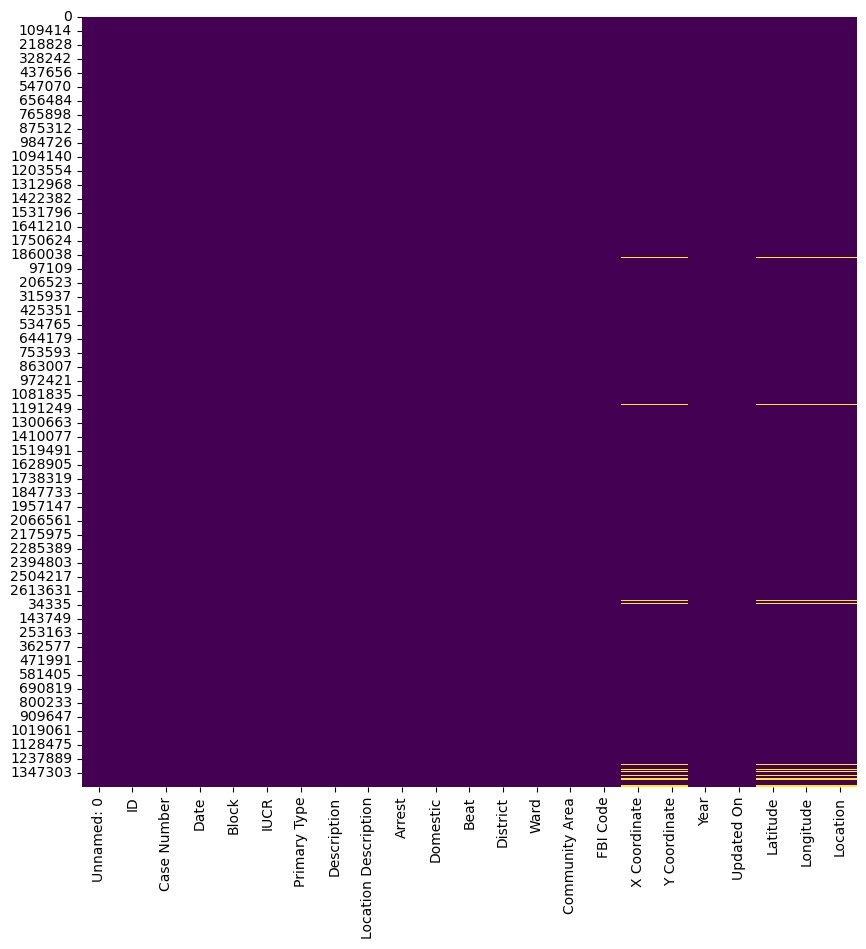

In [5]:
#PLOTTING ALL THE NULL VALUES

plt.figure(figsize=(10, 10))
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='viridis') 

In [6]:
#DROPPING UNCESSARY COLUMNS

chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate', 'Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','District','Latitude','Longitude'], axis=1, inplace=True)

In [7]:
#VISULIAZING THE CLEAN DATASET

chicago_df.head(10)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,03/30/2006 10:30:00 PM,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [8]:
#CONVERTING THE FORMAT OF THE DATE COLUMN AND USING IT AS INDEX

chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format='%m/%d/%Y %I:%M:%S %p') 
chicago_df.index = pd.DatetimeIndex(chicago_df['Date'])

In [9]:
#VISULIAZING THE UPDATED DATASET

chicago_df.head(10)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
2006-03-30 22:30:00,2006-03-30 22:30:00,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
2006-04-05 12:10:00,2006-04-05 12:10:00,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
2006-04-05 15:00:00,2006-04-05 15:00:00,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
2006-04-05 21:30:00,2006-04-05 21:30:00,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False


In [10]:
#FINDING OUT THE COUNT OF UNIQUE VALUES IN THE PRIMARY TYPE COLUMN

chicago_df['Primary Type'].value_counts()

Primary Type
THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                58

In [11]:
#FOCUSING ON TOP 15 CRIME TYPES

chicago_df['Primary Type'].value_counts().iloc[:15]

Primary Type
THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: count, dtype: int64

In [12]:
#SAVING THE ORDER OF CRIME TYPES

order = chicago_df['Primary Type'].value_counts().iloc[:15].index

<Axes: xlabel='count', ylabel='Primary Type'>

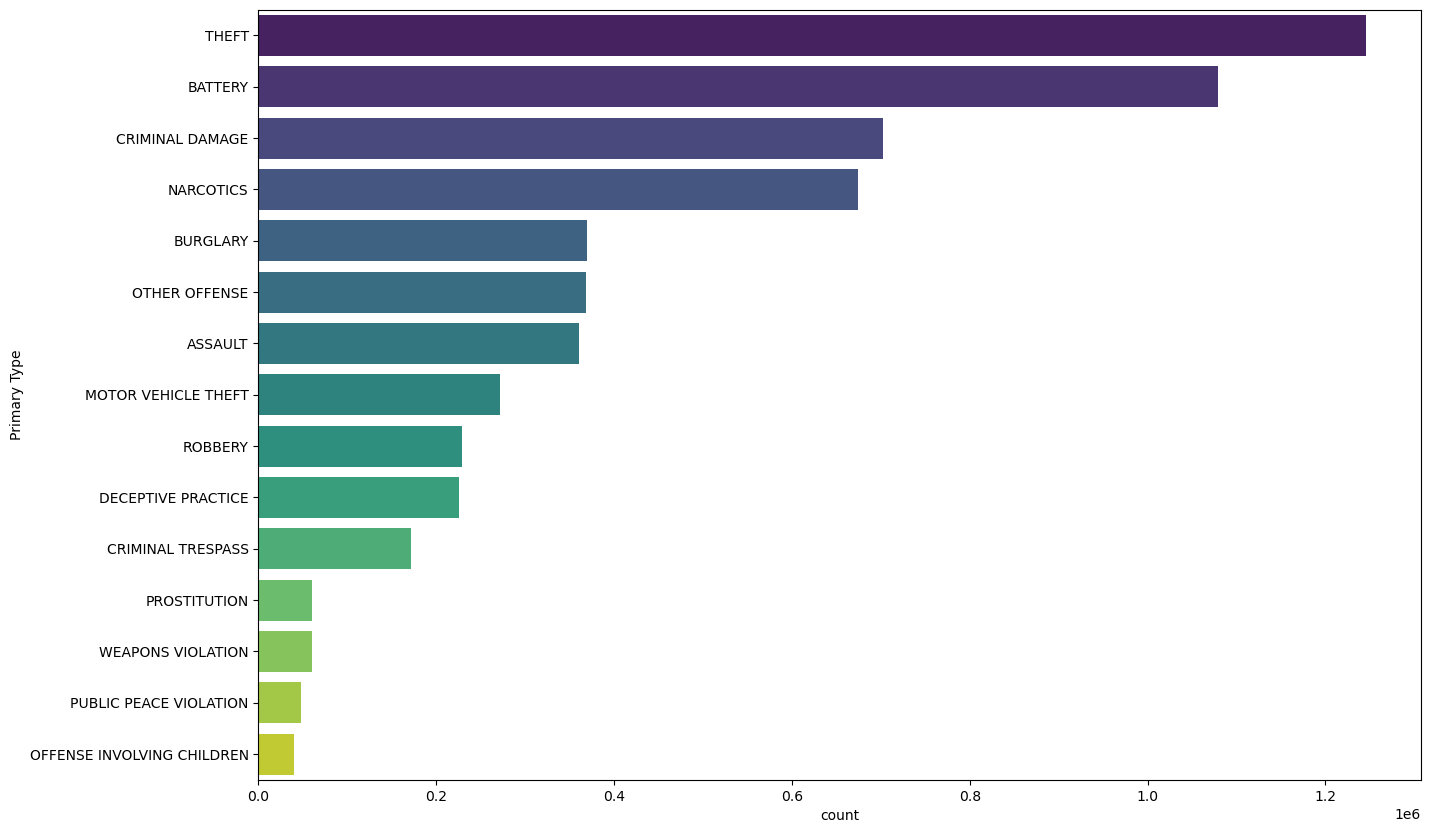

In [13]:
#CREATING A BAR PLOT BY COUNT

plt.figure(figsize = (15,10))
sns.countplot(data=chicago_df, y='Primary Type', order=order, palette='viridis')


<Axes: xlabel='count', ylabel='Location Description'>

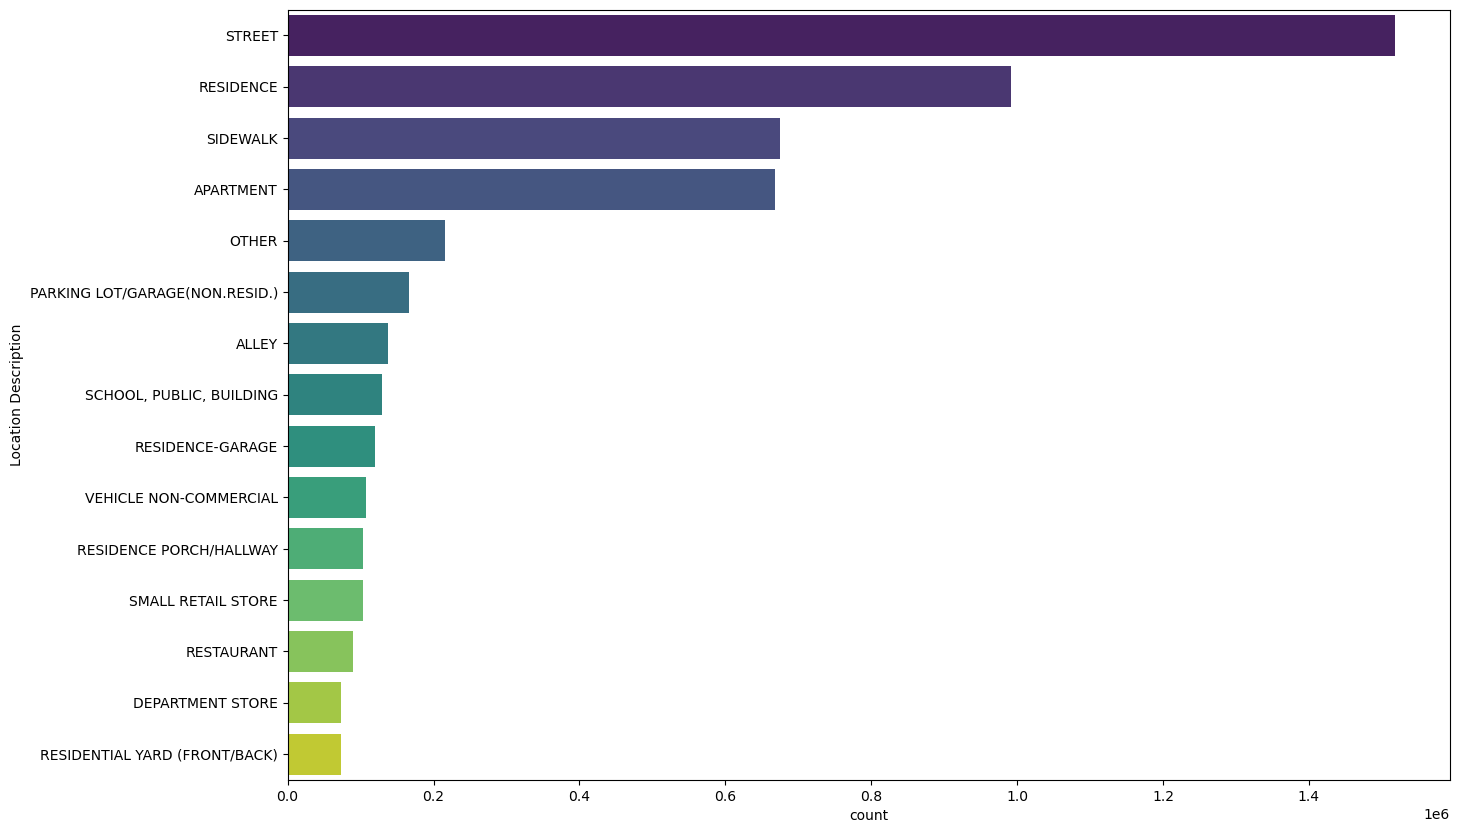

In [14]:
#CREATING A BAR PLOT FOR LOCATION BY COUNT

plt.figure(figsize = (15,10))
sns.countplot(data=chicago_df, y='Location Description',order=chicago_df['Location Description'].value_counts().iloc[:15].index, palette='viridis')

Text(0, 0.5, 'Number of Crimes')

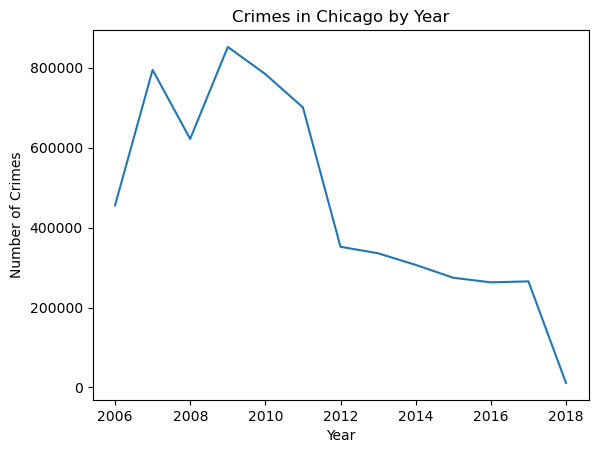

In [15]:
#CREATING A PLOT OF CRIMES BY TIMEFRAME - YEAR

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes in Chicago by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

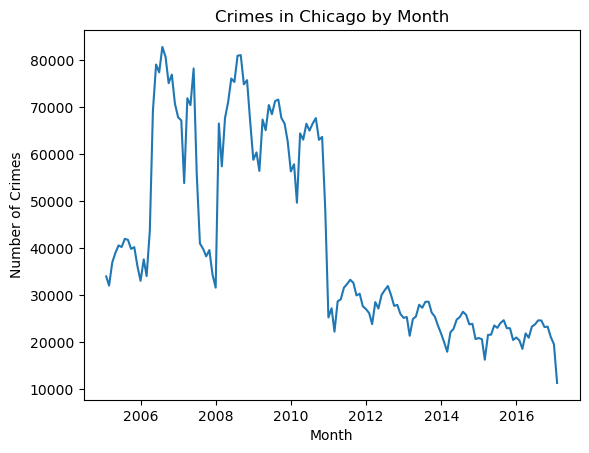

In [16]:
#CREATING A PLOT OF CRIMES BY TIMEFRAME - MONTH

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes in Chicago by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

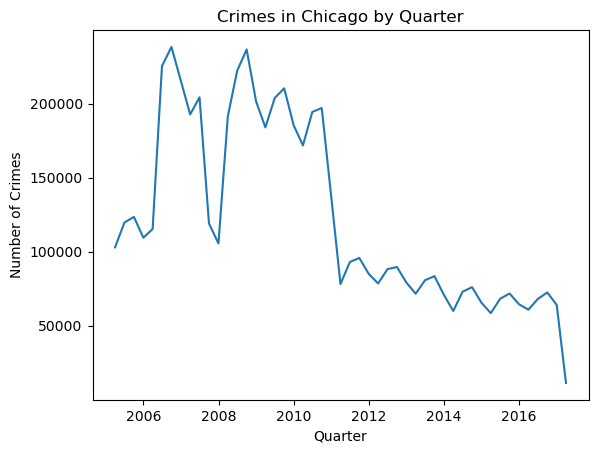

In [17]:
#CREATING A PLOT OF CRIMES BY TIMEFRAME - QUARTER

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes in Chicago by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [18]:
#PREPARING THE DATA FOR THE PROPHET MODEL

chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [19]:
#RENAMING THE COLUMNS FOR PROPHET

chicago_prophet.columns = ['Date','Crime']
chicago_prophet_df = pd.DataFrame(chicago_prophet)
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime':'y'})

In [20]:
#FITTING THE PROPHET MODEL

m = Prophet()
m.fit(chicago_prophet_df_final)

00:09:24 - cmdstanpy - INFO - Chain [1] start processing
00:09:24 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
#MAKING A PREDICTION

future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.667500,38981.786811,71511.916130,60454.667500,60454.667500,-4762.437511,-4762.437511,-4762.437511,-4762.437511,-4762.437511,-4762.437511,0.0,0.0,0.0,55692.229989
1,2005-02-28,60322.264404,33379.523708,67545.184788,60322.264404,60322.264404,-9500.529158,-9500.529158,-9500.529158,-9500.529158,-9500.529158,-9500.529158,0.0,0.0,0.0,50821.735246
2,2005-03-31,60175.675261,42067.528434,74978.913441,60175.675261,60175.675261,-1224.159464,-1224.159464,-1224.159464,-1224.159464,-1224.159464,-1224.159464,0.0,0.0,0.0,58951.515798
3,2005-04-30,60033.814801,43471.741947,76884.603962,60033.814801,60033.814801,1182.841392,1182.841392,1182.841392,1182.841392,1182.841392,1182.841392,0.0,0.0,0.0,61216.656193
4,2005-05-31,59887.225659,49177.900134,82431.596659,59887.225659,59887.225659,5498.275206,5498.275206,5498.275206,5498.275206,5498.275206,5498.275206,0.0,0.0,0.0,65385.500865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2019-01-27,5334.020330,-16330.760052,16650.292606,4861.484405,5760.234001,-4991.704476,-4991.704476,-4991.704476,-4991.704476,-4991.704476,-4991.704476,0.0,0.0,0.0,342.315854
871,2019-01-28,5320.953461,-16786.553634,17075.019241,4847.109292,5748.324454,-4936.569857,-4936.569857,-4936.569857,-4936.569857,-4936.569857,-4936.569857,0.0,0.0,0.0,384.383604
872,2019-01-29,5307.886592,-15597.576023,17422.067501,4832.734178,5736.953557,-4881.447807,-4881.447807,-4881.447807,-4881.447807,-4881.447807,-4881.447807,0.0,0.0,0.0,426.438784
873,2019-01-30,5294.819723,-16555.331336,15888.743107,4818.359065,5725.582661,-4829.092841,-4829.092841,-4829.092841,-4829.092841,-4829.092841,-4829.092841,0.0,0.0,0.0,465.726882


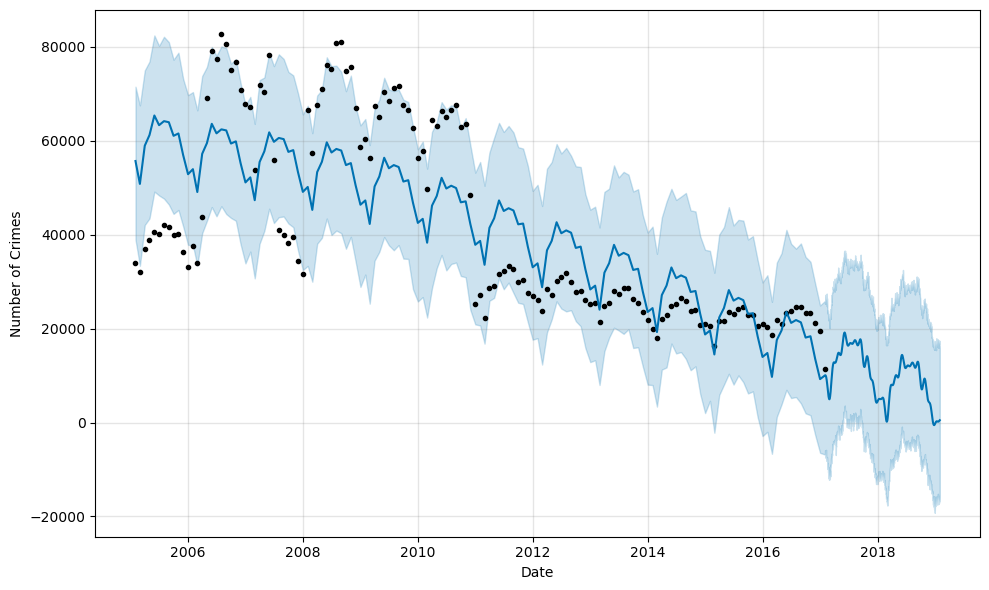

In [22]:
#VISUALIZING THE PREDICTION

figure = m.plot(forecast, xlabel='Date', ylabel='Number of Crimes')

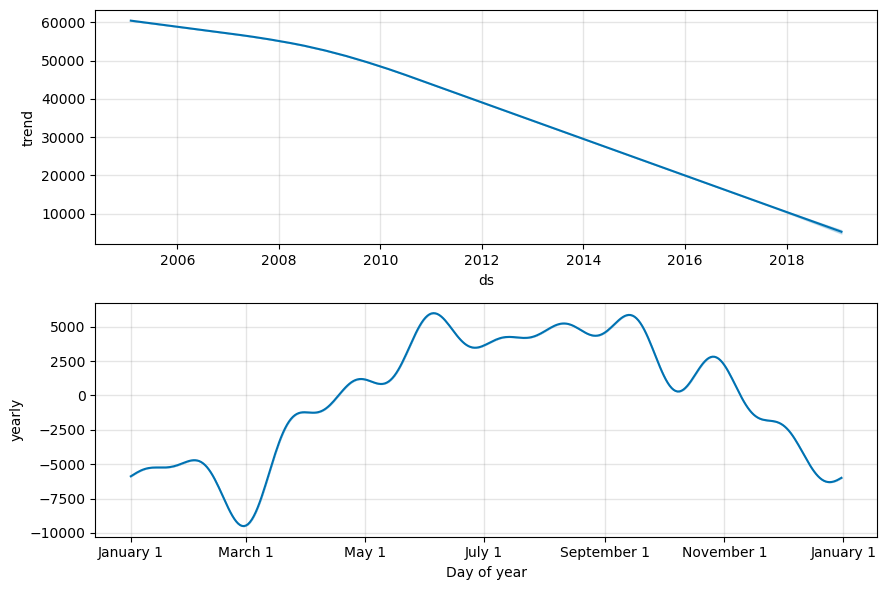

In [23]:
#PLOTTING THE COMPONENTS

figure = m.plot_components(forecast)